# House Price Prediction Model

## Import Libraries and Helpers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Load and Inspect Dataset

### Loading House Prediction Dataset

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Inspecting Dataset

In [4]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# summary statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# checking for missing values
df.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

## Visual and Insights

In [7]:
# identifying numeric and categorical columns
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

numeric_features, categorical_features[:10]  # preview first 10 categories

(['Id',
  'MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'],
 ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1'])

In [8]:
sns.set(style="whitegrid")

### SalePrice Distribution - Histogram

House prices often follow a right-skewed distribution, meaning most homes are moderately priced, with fewer extremely expensive properties.


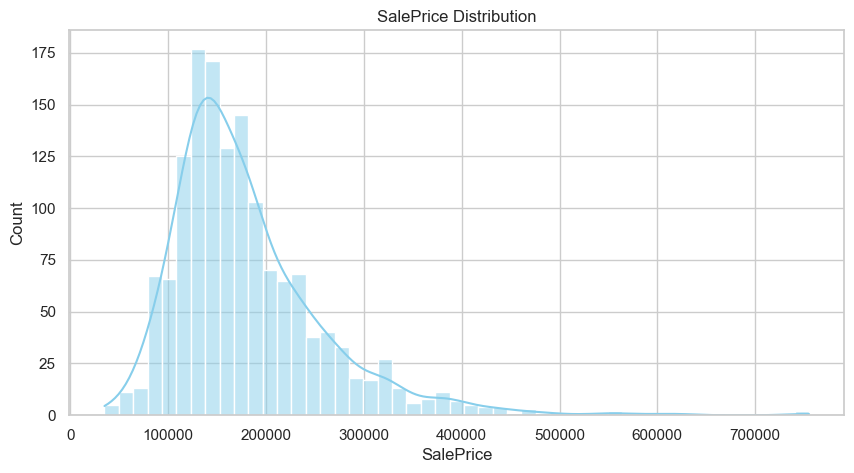

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df["SalePrice"], kde=True, color="skyblue")
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

**Insight:**  
SalePrice is strongly right-skewed. A log transformation reduces skew and stabilizes variance, which often improves regression model performance.

### Numeric Features vs SalePrice

I have visualized here how major numeric predictors relate to SalePrice. I have used these 3 most important features:

- GrLivArea — Above ground living area
- TotalBsmtSF — Basement area
- OverallQual — Quality rating (1–10)

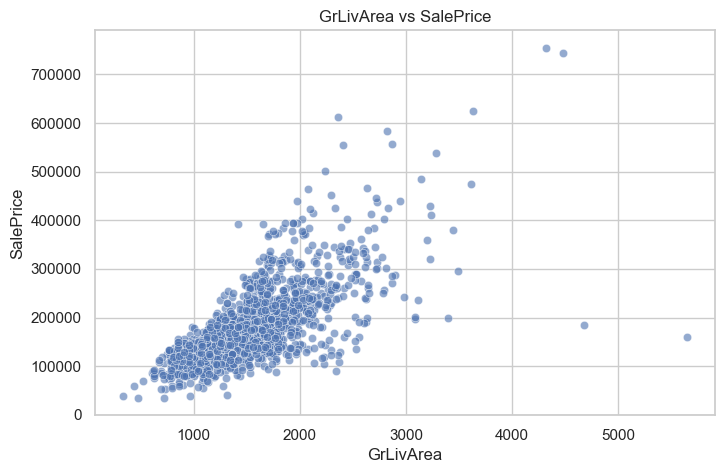

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", alpha=0.6)
plt.title("GrLivArea vs SalePrice")
plt.show()

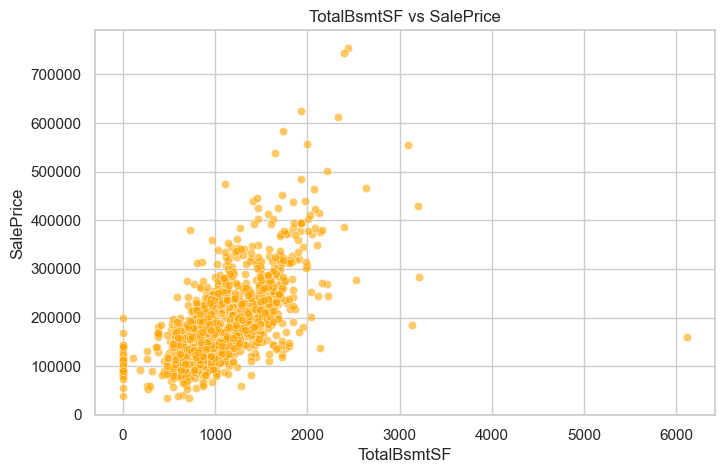

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="TotalBsmtSF", y="SalePrice", alpha=0.6, color="orange")
plt.title("TotalBsmtSF vs SalePrice")
plt.show()

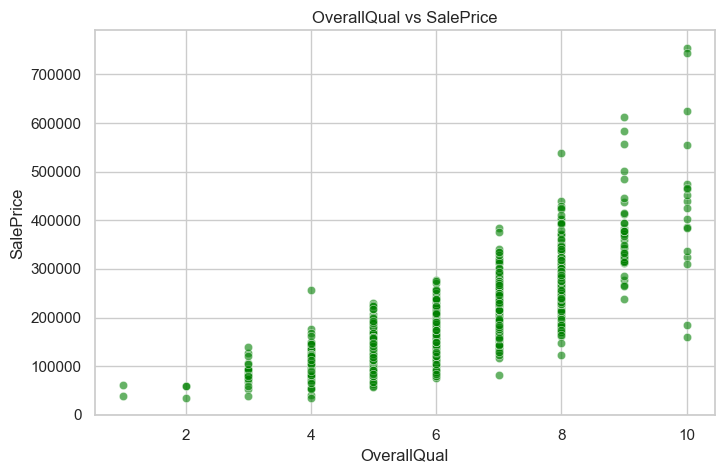

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="OverallQual", y="SalePrice", alpha=0.6, color="green")
plt.title("OverallQual vs SalePrice")
plt.show()

**Insight:**  
- GrLivArea and TotalBsmtSF show strong positive relationships with SalePrice — larger homes sell for more.  
- OverallQual has a very strong upward trend: better quality homes command significantly higher prices.

### Categorical Features vs SalePrice

Using boxplot here to compare price ranges across categorical groups. I have used these 2 most common features:

- Neighborhood
- HouseStyle


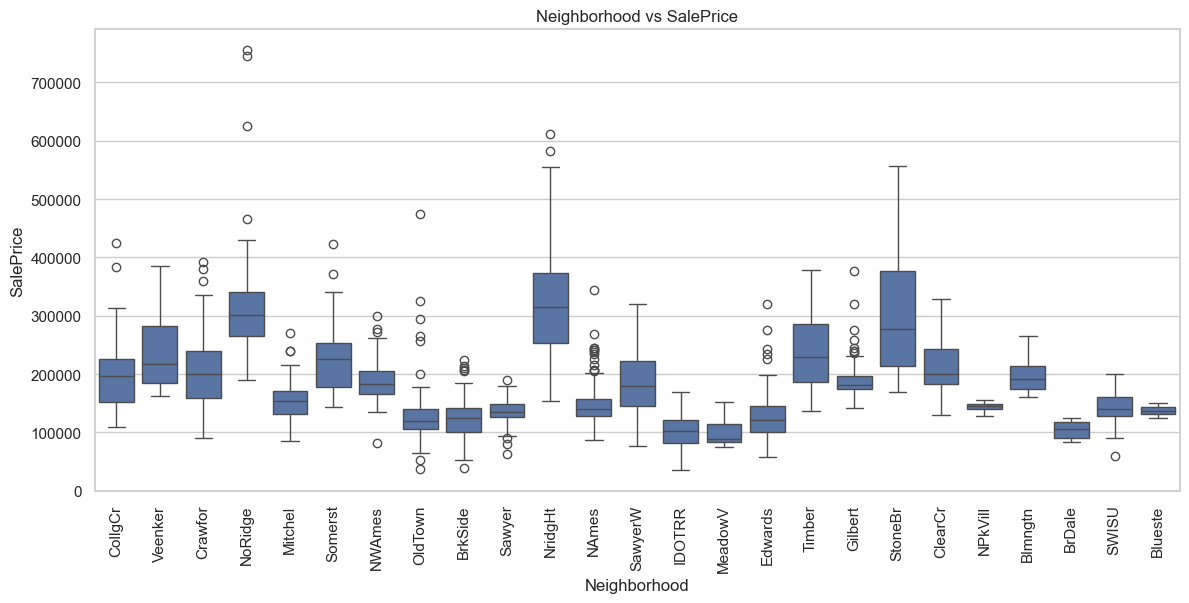

In [13]:
# boxplot 1 - Neighborhood vs SalePrice
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Neighborhood", y="SalePrice")
plt.xticks(rotation=90)
plt.title("Neighborhood vs SalePrice")
plt.show()

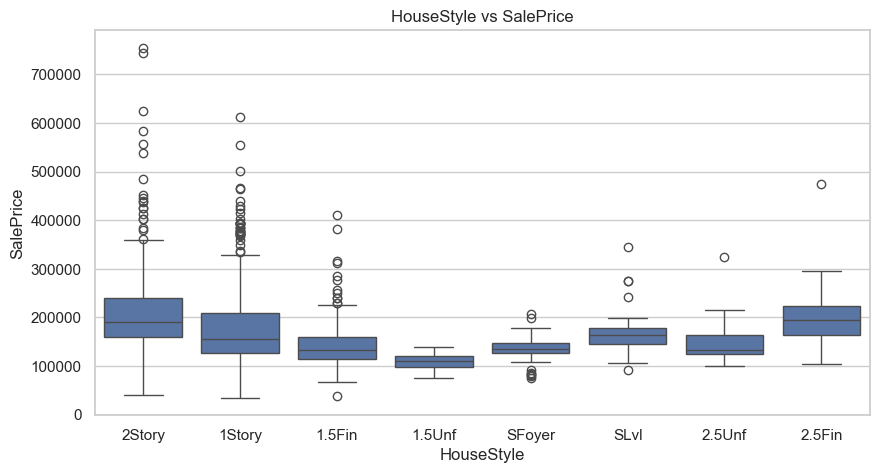

In [14]:
# boxplot 2 - HouseStyle vs SalePrice
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="HouseStyle", y="SalePrice")
plt.title("HouseStyle vs SalePrice")
plt.show()

**Insight:**  
Different neighborhoods show significantly different price levels, indicating strong location effects.  
House-style types also show variation, with certain styles typically commanding higher prices.

### Correlation Heatmap

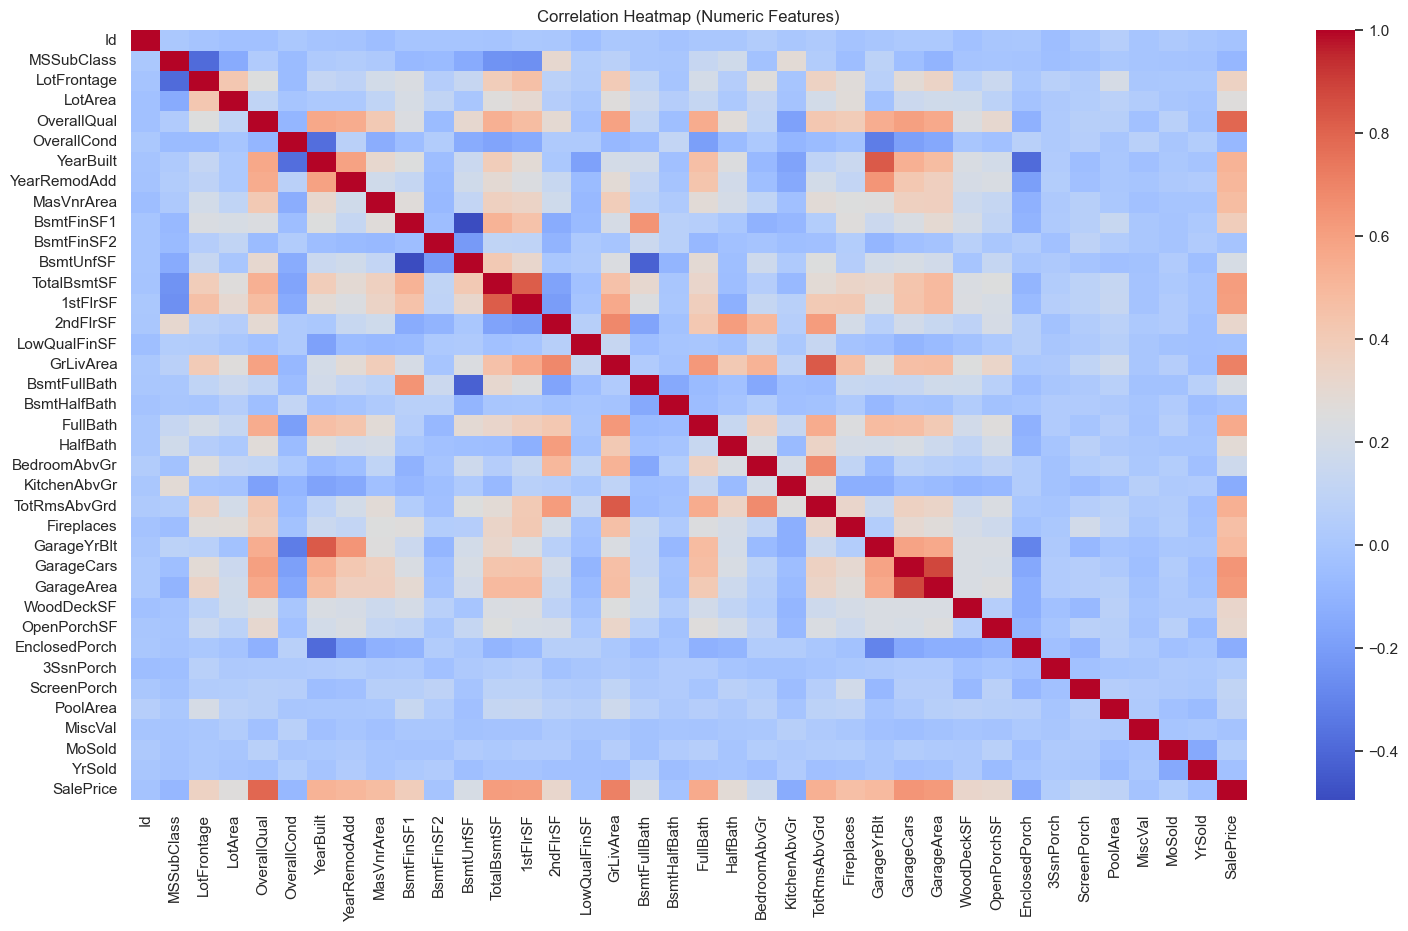

In [15]:
plt.figure(figsize=(18,10))
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

**Insight:**  
The strongest correlations with SalePrice include:  
- OverallQual  
- GrLivArea  
- GarageCars & GarageArea  
- TotalBsmtSF  

These features will likely be highly important for prediction.

## Preprocessing and Split Dataset


In this section:
- Remove non-informative columns
- Separate features (X) and target (y)
- Optionally apply a log transform to `SalePrice`
- Identify numeric and categorical features
- Build a preprocessing pipeline with imputation, scaling and one-hot encoding
- Split the data into training and test sets

### Feature and Target Selection

In [16]:
# Drop unnecessary non-features
df = df.drop(columns=["Id"])

# Target
y = df["SalePrice"]
# Features
X = df.drop(columns=["SalePrice"])

House prices are very skewed; models work better on log prices.

In [17]:
# Log-transform target to reduce skew
y_log = np.log1p(y)   # log(1 + Price)

y_original = y       # keep for reference
y = y_log            # from now on use y as log-price

### Train-Test Split Dataset

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
X_train.shape, X_test.shape

((1168, 79), (292, 79))

**Identify numeric & categorical feature lists (on X, not df)**

In [20]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

numeric_features[:10], categorical_features[:10]  # quick preview

(['MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2'],
 ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1'])

### Building Pipelines for Feature(X) Preprocessing 

**Numeric pipeline: impute (median) + scale**

This pipeline will fillup the missing numeric values with median and scale them.

In [21]:
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

**Categorical pipeline: impute (most frequent) + one-hot encode**

This pipeline will fillup the missing categorical values with the most frequent ones and scale with one-hot encode

In [22]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

**Combining the numerical and categorical pipelines with ColumnTransformer**

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

## Baseline Linear Regression Model Train and Evaluation

### Building the pipeline - Preprocessor + LinearRegression

In [24]:
# baseline linear regression pipeline
baseline_linreg = Pipeline([
    ("preprocessor", preprocessor),
    ("linreg", LinearRegression())
])

baseline_linreg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQual...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('linreg', LinearRegression())])

### Fitting the model on Training Data

In [25]:
baseline_linreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQual...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('linreg', LinearRegression())])

### Predicting on Test Data

In [26]:
y_pred = baseline_linreg.predict(X_test)

### Evaluating Baseline Linear Regression Model (y in log-scale)

In [27]:
# evaluating baseline linear regression
mse_log = mean_squared_error(y_test, y_pred)
rmse_log = np.sqrt(mse_log)
mae_log = mean_absolute_error(y_test, y_pred)
r2_log = r2_score(y_test, y_pred)

print(f"RMSE : {rmse_log:.4f}")
print(f"MAE  : {mae_log:.4f}")
print(f"R²   : {r2_log:.4f}")

RMSE : 0.1281
MAE  : 0.0883
R²   : 0.9121


### Evaluating Baseline Linear Regression Model (y in original-scale)

In [28]:
# converting predictions back to original SalePrice scale
y_test_orig = np.expm1(y_test)
y_pred_orig = np.expm1(y_pred)

mse_orig = mean_squared_error(y_test_orig, y_pred_orig)
rmse_orig = np.sqrt(mse_orig)
mae_orig = mean_absolute_error(y_test_orig, y_pred_orig)
r2_orig = r2_score(y_test_orig, y_pred_orig)

print(f"RMSE (original): {rmse_orig:,.2f}$")
print(f"MAE  (original): {mae_orig:,.2f}$")
print(f"R²   (original): {r2_orig:.4f}$")

RMSE (original): 22,739.77$
MAE  (original): 14,899.28$
R²   (original): 0.9326$


## Train and Evaluate with other Models + Comparison

### Defining Other Models

In [29]:
models = {}

# 1. Linear Regressioon(untuned)
models["Linear Regression"] = Pipeline([
    ("preprocessor", preprocessor),
    ("linreg", LinearRegression())
])

# 2. Ridge Regression
models["Ridge Regression"] = Pipeline([
    ("preprocessor", preprocessor),
    ("ridgereg", Ridge())    
])

# 3. Lasso Regression
models["Lasso Regression"] = Pipeline([
    ("preprocessor", preprocessor),
    ("lassoreg", Lasso())
])

# 4. Random Forest Regressor
models["Random Forest Regressor"] = Pipeline([
    ("preprocessor", preprocessor),
    ("rfreg", RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

# 5. Gradient Boosting Regressor
models["Gradient Boosting Regressor"] = Pipeline([
    ("preprocessor", preprocessor),
    ("gradreg", GradientBoostingRegressor(random_state=42))
])

### Defining Tuned Models(Random Forest and Gradient Boosting) using GridSearchCV

In [30]:
# tuning random forest 
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("rfreg", RandomForestRegressor(random_state=42, n_jobs=-1))
])

rf_param_grid = {
    "rfreg__n_estimators": [100, 200],
    "rfreg__max_depth": [None, 10, 20],
    "rfreg__max_features": ["sqrt", "log2"],
    "rfreg__min_samples_split": [2, 5]
}

rf_grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    cv=5,
    scoring="neg_mean_squared_error", 
    n_jobs=-1,
    verbose=1
)

rf_grid_search.fit(X_train, y_train)

print("Best parameters (Random Forest):")
print(rf_grid_search.best_params_)

best_rf_rmse_cv = np.sqrt(-rf_grid_search.best_score_)
print(f"Best CV RMSE (log-space): {best_rf_rmse_cv:.4f}")

best_rf_pipeline = rf_grid_search.best_estimator_
models["Random Forest Regressor (Tuned)"] = best_rf_pipeline

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters (Random Forest):
{'rfreg__max_depth': None, 'rfreg__max_features': 'sqrt', 'rfreg__min_samples_split': 2, 'rfreg__n_estimators': 200}
Best CV RMSE (log-space): 0.1479


In [31]:
# tuning gradient boosting regressor
gb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("gradreg", GradientBoostingRegressor(random_state=42))
])

# hyperparameter grid for Gradient Boosting
gb_param_grid = {
    "gradreg__n_estimators": [100, 200],
    "gradreg__learning_rate": [0.05, 0.1, 0.2],
    "gradreg__max_depth": [2, 3, 4]
}

gb_grid_search = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=gb_param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

gb_grid_search.fit(X_train, y_train)

print("Best parameters (Gradient Boosting):")
print(gb_grid_search.best_params_)

best_gb_rmse_cv = np.sqrt(-gb_grid_search.best_score_)
print(f"Best CV RMSE (log-space): {best_gb_rmse_cv:.4f}")

best_gb_pipeline = gb_grid_search.best_estimator_
models["Gradient Boosting Regressor (Tuned)"] = best_gb_pipeline

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters (Gradient Boosting):
{'gradreg__learning_rate': 0.05, 'gradreg__max_depth': 3, 'gradreg__n_estimators': 200}
Best CV RMSE (log-space): 0.1327


### Evaluating All Models

In [32]:
# helper function to evaluate with all models
def model_evaluation(name, model, X_train, y_train, X_test, y_test):
    # train model
    model.fit(X_train, y_train)
    # predictions(in log space)
    y_pred = model.predict(X_test)

    # convert back to original sale prices
    y_pred_orig = np.expm1(y_pred)
    y_test_orig = np.expm1(y_test)

    # metrics
    mse = mean_squared_error(y_test_orig, y_pred_orig)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_orig, y_pred_orig)
    r2 = r2_score(y_test_orig, y_pred_orig)

    print(f"{name:35s} -> RMSE : {rmse:.4f} | MAE : {mae:,.2f} | R² : {r2:.4f}")

    return rmse, mae, r2

In [33]:
# evaluating all models and storing results
results = []

for name, model in models.items():
    rmse, mae, r2 = model_evaluation(name, model, X_train, y_train, X_test, y_test)
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

Linear Regression                   -> RMSE : 22739.7741 | MAE : 14,899.28 | R² : 0.9326
Ridge Regression                    -> RMSE : 23856.6945 | MAE : 15,738.72 | R² : 0.9258
Lasso Regression                    -> RMSE : 88270.8537 | MAE : 59,931.24 | R² : -0.0158
Random Forest Regressor             -> RMSE : 29963.8159 | MAE : 17,712.67 | R² : 0.8829
Gradient Boosting Regressor         -> RMSE : 30019.7658 | MAE : 16,926.73 | R² : 0.8825
Random Forest Regressor (Tuned)     -> RMSE : 34765.3740 | MAE : 18,482.06 | R² : 0.8424
Gradient Boosting Regressor (Tuned) -> RMSE : 30761.7621 | MAE : 16,742.79 | R² : 0.8766


In [34]:
# comparison dataframe with all model's result 
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="RMSE", ascending=True).reset_index(drop=True)
results_df

,Model,RMSE,MAE,R²
0,Linear Regression,22739.774051,14899.276389,0.932585
1,Ridge Regression,23856.694526,15738.719034,0.925800
2,Random Forest Regressor,29963.815911,17712.671661,0.882948
3,Gradient Boosting Regressor,30019.765785,16926.734665,0.882510
4,Gradient Boosting Regressor (Tuned),30761.762091,16742.794622,0.876630
5,Random Forest Regressor (Tuned),34765.373965,18482.059355,0.842428
6,Lasso Regression,88270.853655,59931.238025,-0.015829


## Final Model and Interpretation

### Choosing the best model based on lowest RMSE

In [35]:
# selecting the best model based on lowest RMSE
best_row = results_df.sort_values("RMSE").iloc[0]
best_model_name = best_row["Model"]

print("Best model based on RMSE:", best_model_name)
print(best_row)

Best model based on RMSE: Linear Regression
Model    Linear Regression
RMSE          22739.774051
MAE           14899.276389
R²                0.932585
Name: 0, dtype: object


In [36]:
# retrieving the best model pipeline from the models dictionary
best_model = models[best_model_name]
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQual...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('linreg', LinearRegression())])

### Refitting and Evaluation with Best Model

In [37]:
# training the best model on the training data
best_model.fit(X_train, y_train)

# predictions with the best model (log SalePrice)
y_pred_log = best_model.predict(X_test)

# converting back to original SalePrice scale
y_test_orig = np.expm1(y_test)
y_pred_orig = np.expm1(y_pred_log)

# final evaluation metrics
final_mse = mean_squared_error(y_test_orig, y_pred_orig)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test_orig, y_pred_orig)
final_r2 = r2_score(y_test_orig, y_pred_orig)

print(f"Final Model: {best_model_name}")
print(f"RMSE (original $): {final_rmse:,.2f}")
print(f"MAE  (original $): {final_mae:,.2f}")
print(f"R²                : {final_r2:.4f}")

Final Model: Linear Regression
RMSE (original $): 22,739.77
MAE  (original $): 14,899.28
R²                : 0.9326


### Plotting Predicted vs Actual SalePrice

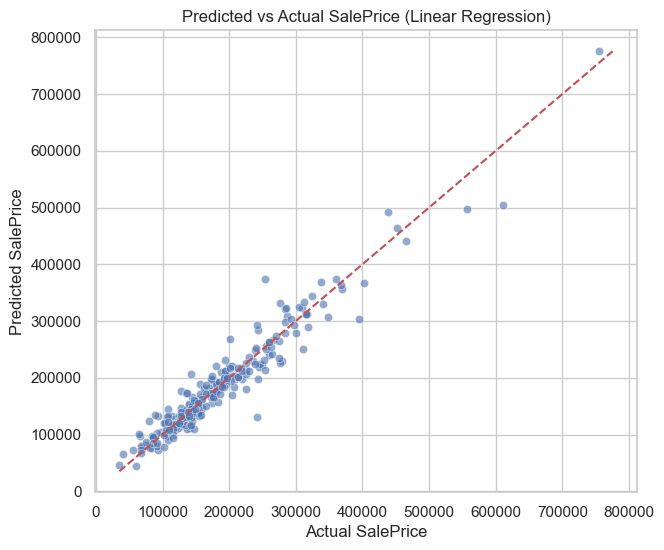

In [38]:
# predicted vs actual prices
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test_orig, y=y_pred_orig, alpha=0.6)
max_price = max(y_test_orig.max(), y_pred_orig.max())
min_price = min(y_test_orig.min(), y_pred_orig.min())

plt.plot([min_price, max_price], [min_price, max_price], "r--")  # ideal line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title(f"Predicted vs Actual SalePrice ({best_model_name})")
plt.show()

### Feature Importance 

In [39]:
# extracting feature names after preprocessing
feature_names = best_model.named_steps["preprocessor"].get_feature_names_out()

# get the final estimator inside the pipeline (last step)
final_step_name = list(best_model.named_steps.keys())[-1]
estimator = best_model.named_steps[final_step_name]

# get importance values
if hasattr(estimator, "feature_importances_"):
    importances = estimator.feature_importances_
elif hasattr(estimator, "coef_"):
    # for linear models, use absolute value of coefficients
    importances = np.abs(estimator.coef_)
else:
    importances = None
    print("This estimator does not provide feature_importances_ or coef_.")

if importances is not None:
    # build a DataFrame of feature importances
    fi_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    # show top 15 features
    fi_top15 = fi_df.head(15)
    fi_top15

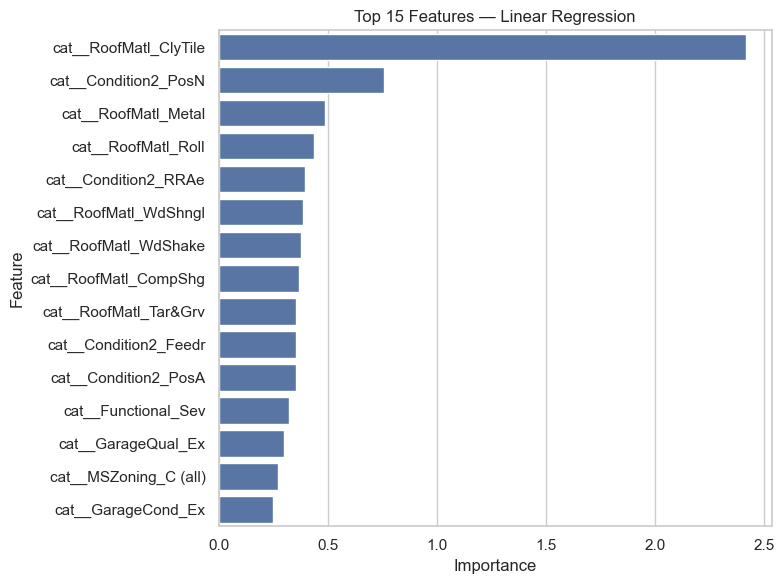

In [40]:
# plotting top features
if importances is not None:
    plt.figure(figsize=(8,6))
    sns.barplot(data=fi_top15, x="Importance", y="Feature")
    plt.title(f"Top 15 Features — {best_model_name}")
    plt.tight_layout()
    plt.show()


### Final Model Summary

The best-performing model based on lowest RMSE was **Linear Regression**. Although more complex models were tested (Ridge, Lasso, Random Forest, Gradient Boosting), Linear Regression provided the strongest generalization performance on the test set.

**Performance (Original SalePrice Scale)**

- RMSE: $22,739.77
- MAE: $14,899.28
- R²: 0.9326

These results indicate that the model explains approximately 93% of the variation in house prices, with average prediction errors around $15,000. The predicted vs actual plot shows a strong linear relationship, and residuals are centered around zero, suggesting no major bias.

**Interpretation**

Key predictors include property quality (OverallQual), above-ground living area (GrLivArea), garage capacity, and basement size. These variables strongly influence housing prices, which aligns with common real-estate valuation factors.

**Conclusion**

Linear Regression, combined with proper preprocessing (imputation, scaling, encoding), provides an effective and interpretable baseline for house price prediction. The model performs well across diverse homes and can be further improved through additional feature engineering or more advanced regression techniques.